Matematiikassa <i>algoritminen ongelma</i> on jokin ongelma, johon jokaisella sallitulla syötteellä saadaan jokin tietty vastaus (tuloste). Esimerkiksi kysymys "Onko kokonaisluku $a$ alkuluku?" on algoritminen ongelma, johon vastaus on luvusta $a$ riippuen "kyllä" tai "ei". Tätä ongelmaa kutsutaan nimellä $PRIME(a)$. Algoritmisen ongelman ratkaiseva <i>algoritmi</i> on menetelmä, joka antaa jokaiselle syötteelle oikean tulosteen. Algoritmin eräs hyvyyden mittari on sen nopeus. Nopeutta mitataan tarvittavien alkeisoperaatioiden lukumäärällä syötteen koon suhteen. Kun syötteet ovat lukuja, sovitaan, että syötteen koko on luvun binääriesityksen pituus, ja alkeisoperaatiot ovat yksibittisten lukujen välisiä operaatioita. Algoritmin suoritusnopeus voi vaihdella paljon samanpituisten syötteiden välillä, joten voidaan puhua pahimman, keskimääräisen tai parhaan tapauksen aikavaativuudesta. Käytetään merkintää $T_A(n)$ algoritmin $A$ vaatimien alkeisoperaatioiden lukumäärästä huonoimmassa tapauksessa, kun syötteen koko on $n$. Jos algoritmin aikavaativuutta syötteen koon $n$ suhteen rajoittaa ylhäältä jokin polynomi $P(n)$, sanotaan, että algoritmi on polynomiaikainen. Polynomiajassa toimivia algoritmeja sanotaan <i>toteutettaviksi</i>. Ongelma on <i>ratkeava</i>, jos on olemassa algoritmi, joka ratkaisee sen polynomiajassa. 

Määritellään $f(n) = O(g(n))$, jos on olemassa sellaiset vakio $\alpha > 0$ ja luku $n_0 \in \mathbb{N}$, että kaikilla $n > n_0$ pätee $f(n) \leq \alpha g(n)$. Epäformaalisti muotoiltuna määritelmä sanoo, että funktio $f$ kuuluu luokkaan $O(g(n))$, jos funktion $f(n)$ kuvaaja lopulta kulkee sopivasti skaalatun funktion $g(n)$ alapuolella. Polynomiaikaisuus voidaan muotoilla näillä merkinnöillä seuraavasti: algoritmi $A$ on polynomiaikainen, jos on olemassa $k \in \mathbb{N}$, jolle $T_A(n) = O(n^k)$.

Ratkeaville ongelmille on olemassa melko yksinkertaisiakin ei-toteutettavia algoritmeja. Esimerkiksi voidaan testata, onko luku $a$ alkuluku kokeilemalla, jakaako mikään luku $i \leq \sqrt{a}$ luvun $a$. Jos vain luku $1$ jakaa luvun $a$, niin $a$ on alkuluku. Tämä algoritmi selvästi antaa oikean vastauksen, mutta jakolaskuja pitää tehdä eksponentiaalinen määrä luvun $a$ pituuden suhteen. On kuitenkin keksitty verrattomasti hienostuneempia deterministisiä algoritmeja, jotka ratkaisevat ongelman $PRIME(a)$ polynomiajassa (esim. AKS-algoritmi, 2002), tosin hitaasti, ja satunnaisuutta hyödyntäviä todennäköisyysalgoritmeja, jotka toimivat kohtuullisessa ajassa.

Koulussa opetetaan, että "kertolasku on vain yhteenlaskua monta kertaa". Kokonaisluvuille väite pitää tavallaan paikkansa, mutta mekaanisesti ne ovat silloinkin aivan eri ongelma. Kokonaislukujen $a$ ja $b$ tulon $ab$ laskeminen naiivisti toistamalla yhteenlaskua käy tavattoman työlääksi jo silloin, kun pienempi luvuista $a$ ja $b$ on kaksinumeroinen. Oletetaan, että $a \geq b$ ja sovitaan, että tässä kertolaskualgoritmissa lukua $a$ lasketaan yhteen $b$ kertaa. Merkitään jatkossa $n = \lceil log_2(a) \rceil$, siis $n$ on suuremman tulontekijän binääriesityksen pituus. Tulon $ab$ laskemisessa täytyy silloin tehdä $n$-bittisten lukujen yhteenlaskuja $b$ kertaa. Lisäksi yhteenlaskettavat kasvavat laskelman edetessä, ja suurimmillaan tulo voi olla $2n$-bittinen luku. Luku $2n$ eroaa luvusta $n$ vain vakiolla $2$ kerrottuna, joten ne ovat asymptoottisessa mielessä samaa suuruusluokkaa, siis $2n$ kuuluu luokkaan $O(n)$. Voidaan osoittaa, että kahden $n$-bittisen luvun yhteenlasku tarvitsee luokkaa $O(n)$ bittioperaatiota. Kaiken kaikkiaan tulon $ab$ laskeminen tällä tavalla vie $b \cdot O(n) \leq 2^{n+1} \cdot O(n) = O(2^n)$ bittioperaatiota. Edellä kuvattu kertolaskualgoritmi ei siis ole toteutettava. Koulussa opetettu algoritmi kertoa lukuja allekkain sen sijaan kuuluu luokkaan $O(n^2)$, joten kokonaislukujen tulon laskeminen on ratkeava ongelma.

Tässä kirjoitelmassa tarkastellaan kahta algoritmia, jotka ratkaiseavat saman ongelman, mutta suoriutuvat tehtävästä hyvin eri nopeudella.

# Algoritmit

Seuraavat kaksi algoritmia laskevat lukujen $a$ ja $b \in \mathbb{N}$ suurimman yhteisen tekijän $syt(a,b)$, kun $a \neq 0$ tai $b \neq 0$. Ne siis ratkaisevat ongelman $SYT(a,b)$.

#### Algoritmi 1
Ensimmäisessä algoritmissa vähennetään lukuja $a$ ja $b$ toisistaan vuorotellen niin, että luvut pysyvät ei-negatiivisina. Tällä tavoin päästään pienimpään positiiviseen lukuun $d$, joka voidaan esittää alkuperäisten lukujen $a$ ja $b$ lineaarikombinaationa. Luku $d$ lukujen $a$ ja $b$ suurin yhteinen tekijä. Algoritmissa 1 käytetään vertailuja ja vähennyslaskuja, jotka voidaan suorittaa $O(n)$ bittioperaatiolla.

In [1]:
def syt(a, b):
    kierros = 0
    while a > 0 and b > 0:
        if a > b:
            a = a - b
        else:
            b = b - a
        kierros += 1
    return (a, kierros)

Algoritmissa pidetään kirjaa tarvittavien kierrosten määrästä. Jokaisella kierroksella tehdään kolme vertailua ja yksi vähennyslasku, eli yksi kierros vaatii $O(n)$ bittioperaatiota.

#### Algoritmi 2 (Eukleideen algoritmi)
Toinen algoritmi on tuttu Eukleideen algoritmi, joka on eräs maailman vanhimmista tunnetuista algoritmeista. Algoritmissa tarvitaan kahden luvun jakojäännöstä, jonka laskeminen onnistuu $O(n^2)$ bittioperaatiolla.

In [2]:
def eukl(a, b):
    q = max(a, b)
    r = min(a, b)
    kierros = 0
    while r != 0:
        q, r = r, q % r
        kierros += 1
    return (q, kierros)

Huomataan siis, että algoritmin 1 yksittäinen kierros on nopeampi kuin algoritmin 2. 


# Aikavaativuus

Vertaillaan seuraavaksi algoritmien vaatimien kierrosten lukumäärää.

In [3]:
def vertailu(a, b):
    print(f"syt({a},{b}) = {syt(a, b)[0]}")
    print("Alg.| kierrosten lkm")
    print(f" 1  |   {syt(a, b)[1]}")
    print(f" 2  |   {eukl(a, b)[1]} \n")

In [61]:
vertailu(233, 144)  # Fibonaccin luvut F_13 ja F_12 
vertailu(233, 233)
vertailu(233, 1)

syt(233,144) = 1
Alg.| kierrosten lkm
 1  |   12
 2  |   11 

syt(233,233) = 233
Alg.| kierrosten lkm
 1  |   1
 2  |   1 

syt(233,1) = 1
Alg.| kierrosten lkm
 1  |   233
 2  |   1 



Peräkkäisten Fibonaccin lukujen sytin laskemisessa algoritmit suoriutuvat suunnilleen yhtä monessa kierroksessa, samoin kun lasketaan luvun syt itsensä kanssa. Kuitenkin luvun $syt(a, 1)$ laskemiseen algoritmilla 1 menee $a$ kierrosta, eli $O(2^n)$ laskutoimitusta ja vertailua!

On hieman huolimatonta vertailla algoritmeja pelkästään aritmeettisten operaatioiden suhteen, kun algoritmien käyttämät operaatiot ovat keskenään eri kompleksisuusluokkaa. Huomautettakoon, että algoritmi 1 toimii Eukleideen algoritmia paremmin peräkkäisillä Fibonaccin luvuilla, koska kierrokset on aikakompleksisuusmielessä edullisempia.

# Visualisointi
Havainnollistetaan molempien algoritmien suorituskykyä eri tapauksissa piirtämällä kuvia.

In [5]:
%matplotlib inline

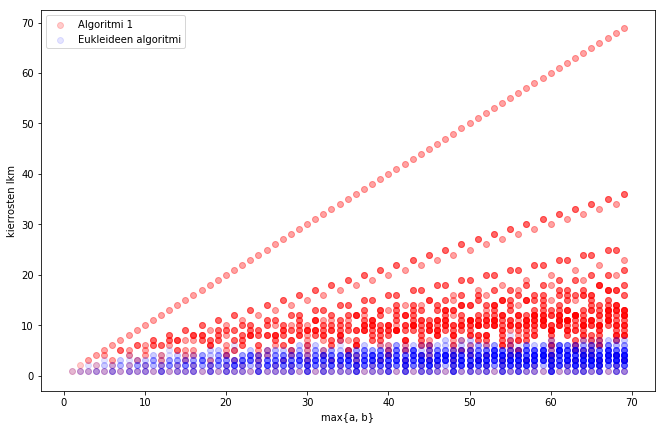

In [59]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(11, 7))

n = 70

x = []
y1 = []
y2 = []

for a in range(1, n):
    for b in range(1, a + 1):
        x.append(a)
        y1.append(syt(a, b)[1])
        y2.append(eukl(a, b)[1])

axs.scatter(x, y1, c = 'r', alpha = 0.2, label="Algoritmi 1")
axs.scatter(x, y2, c = 'b', alpha = 0.1, label="Eukleideen algoritmi")

axs.legend()
axs.set_xlabel('max{a, b}')
axs.set_ylabel('kierrosten lkm')

plt.show()

Kun syötteitä on kaksi ja tulosteita yksi, tilanne on luonteeltaan kolmiuotteinen. Kuvaajassa on pallo kohdassa $(x, y)$ jos jollakin syötteillä $x, x'$, missä $x \geq x'$, luvun $syt(x, x')$ laskemiseen tarvitaan $y$ kierrosta. Punaisella on merkitty algoritmin 1 tarvitsemien kierrosten lukumäärä. Algoritmin 1 kuviossa on muutamia haaroja, joissa kierroksia vaaditaan todella paljon, muun muassa $syt(a,1)$, $syt(a,2)$ ja $syt(a, a-1)$. Kuvaajastakin havaitaan, että pahimmissa tapauksissa algoritmi 1 tarvitsee $a$ kierrosta. Algoritmin 1 huonoimman tapauksen suorituskykyä voidaan parantaa asettamalla alkuun ehto "jos toinen syötteistä on $1$, niin tuloste on $1$". Kuitenkin yhä luvun $syt(a, 2)$ laskemiseen tarvitaan noin $\frac{a}{2}$ kierrosta, mikä on eksponentiaalinen määrä luvun $a$ pituuden suhteen. Eukleideen algoritmin vaatimat kierrokset (sinisellä) taas kasvavat todella hillitysti.

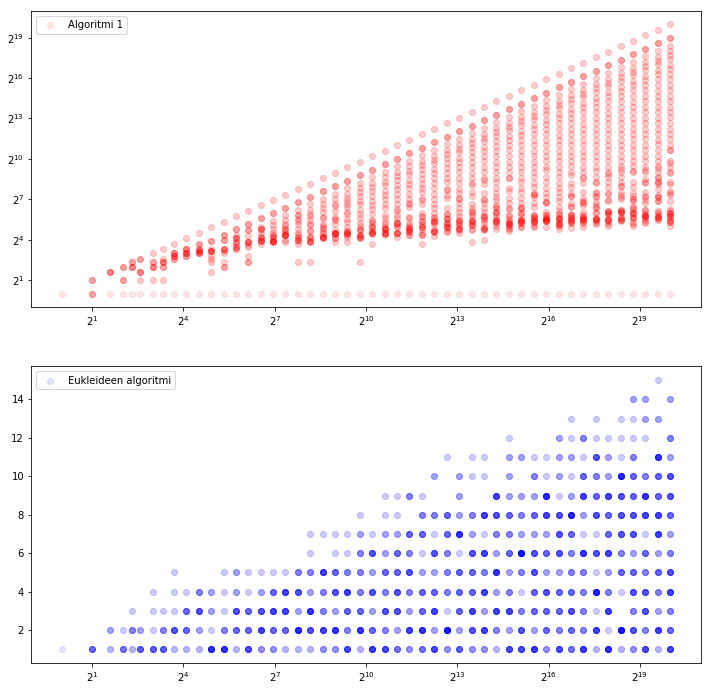

In [68]:
fig, axs = plt.subplots(2, figsize=(12, 12))

n = 20  # syötteen suurin koko
s = 50  # pisteiden lukumäärä

points = np.ceil((np.logspace(0, n, s, base=2)))

x = [max(a, b) for b in points for a in points]
y1 = [syt(a, b)[1] for b in points for a in points]
y2 = [eukl(a, b)[1] for b in points for a in points]

axs[0].scatter(x, y1, c='r', alpha=0.1, label="Algoritmi 1")
axs[1].scatter(x, y2, c='b', alpha=0.1, label="Eukleideen algoritmi")

axs[0].loglog(basex=2, basey=2)
axs[1].semilogx(basex=2)

axs[0].legend()
axs[1].legend()

plt.show()

Yllä vielä kuvattuna algoritmien tarvitsemien kierrosten määrää logaritmisella asteikolla. Ensimmäisessä kuvaajassa molemmat akselit ovat logaritmisia ja alemmassa y-akseli on lineaarinen. Luvun $2$ eksponentti x-akselilla merkitsee siis syötteenä annetun luvun $a$ pituutta. Algoritmissa 1 pahimmat tapaukset tarvitsevat kuvasta katsottuna eksponentiaalisen määrän kierroksia. Siksi ei ole mitään väliä sillä, miten monta bittioperaatiota yhden kierroksen suorittaminen vie. Luvun $1$ vähentäminen luvusta $a$ on vakioaikainen operaatio, mutta algoritmi muuttuu kelvottomaksi, jos vakioaikaisia operaatioita täytyy tehdä eksponentiaalinen määrä.

Eukleideen algoritmi taas näyttää kuvasta katsottuna suoriutuvan lineaarisessa määrässä kierroksia kaikissa tapauksissa. Voidaan osoittaa, että Eukleideen algoritmissa kierroksia tarvitaan korkeintaan $O(n)$ kappaletta. Joissain tapauksissa vähemmällä ei selviä, esimerkiksi kun $a$ ja $b$ ovat peräkkäiset Fibonaccin luvut. Koska jakolasku voidaan tehdä ajassa $O(n^2)$, algoritmi kuuluu aikakompleksisuusluokkaan $O(n^3)$ ja se on toteutettava. Siis ongelma $SYT(a,b)$ on ratkaistava.